# IPL SCORE PREDICTION : REGRESSION APPROACH

This project aims to build a predictive model using a neural network to estimate the total score in an Indian Premier League (IPL) cricket match based on various features. The dataset contains information such as venue, batting team, bowling team, batsman, and bowler. By preprocessing the data and applying machine learning techniques, the model can predict the total score, enhancing decision-making and strategy planning for cricket teams.

<img src="img.jpg" width="500" height="500">

# Step 1: Importing Libraries

In this step, we import essential libraries required for data manipulation, visualization, and building the neural network model.
- pandas and numpy for data handling and numerical operations.
- matplotlib and seaborn for data visualization.
- sklearn.preprocessing for preprocessing tasks like label encoding and scaling.
- keras and tensorflow for creating and training the neural network.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


# Step 2: Loading Data

This step involves reading the IPL dataset from a CSV file into a DataFrame and displaying the first few rows. This helps in understanding the structure and features of the dataset. Viewing the initial rows provides insight into the types of data available for model training.

In [14]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Step 3: Data Pre-processing

In this step, we create a new DataFrame by dropping several columns from the original DataFrame that are deemed unimportant for our prediction task. The new DataFrame, df, contains only the relevant columns that we will use to train the predictive model. This step simplifies the dataset and focuses on the most impactful features.

In [15]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)


# Step 4: Separating Features and Target Variable

Here, we separate the dataset into features (X) and the target variable (y). The target variable, total, is the score we aim to predict. X contains all the features used for making this prediction. This separation is crucial for supervised learning, where the model learns to map features to the target variable.

In [16]:
X = df.drop(['total'], axis=1)
y = df['total']


# Step 5: Label Encoding

Categorical features need to be converted into numerical values for the neural network to process. Label encoding transforms each category into a unique integer. This step is necessary for handling categorical data in machine learning models, as most models require numerical input.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


# Step 6: Train-Test Split

This step involves splitting the dataset into training and testing sets. We train the model on the training set and evaluate its performance on the testing set. This split ensures that we can assess how well the model generalizes to unseen data. A 70-30 split is used here, with 70% of the data for training and 30% for testing.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 7: Feature Scaling

Scaling the features to a uniform range (typically 0 to 1) improves the efficiency and performance of the neural network. MinMaxScaler scales all features so that no single feature dominates the others due to differences in scale. This step is crucial for models sensitive to feature scaling.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 8: Defining the Neural Network Model

This step defines the architecture of the neural network. The model consists of an input layer, two hidden layers with ReLU activation, and an output layer with a linear activation function, suitable for regression tasks. The model is compiled using the Adam optimizer and Huber loss, which is robust to outliers and provides a balance between mean absolute error and mean squared error.

In [20]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


# Step 9: Training the Model

In this step, the neural network is trained on the training data for 50 epochs with a batch size of 64. Validation data is used to monitor the model’s performance on unseen data during training, helping to prevent overfitting and ensuring that the model generalizes well.

In [21]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55.2942 - val_loss: 22.5846
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.4143 - val_loss: 22.1690
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.3679 - val_loss: 21.9511
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.3029 - val_loss: 22.0664
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2116 - val_loss: 21.9264
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2048 - val_loss: 22.1953
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.0509 - val_loss: 21.9399
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1385 - val_loss: 22.1819
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2333 - val_loss: 21.8224
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.0077 - val_loss: 21.9482
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1728 - val_loss: 21.9127
Epoch 12/50
832/832 ━━━━━━━━━━

# Step 10: Plotting Training and Validation Loss

In this step we visualize the training and validation loss over epochs using a line plot. This helps assess how well the model is learning, indicating if it's overfitting (large gap between training and validation loss) or underfitting (both losses are high).

<Axes: >

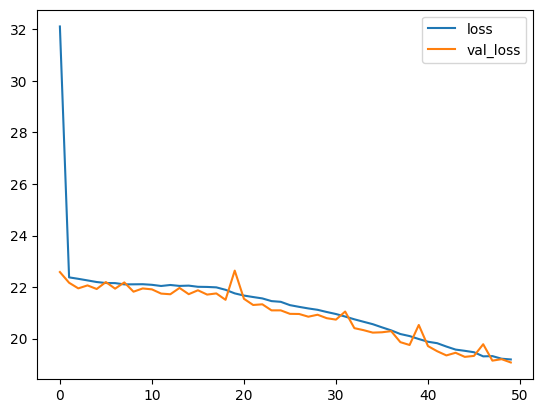

In [22]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


# Step 11: Making Predictions and Evaluating the Model

Here, we use the trained model to predict the scores on the test set. We then evaluate its performance using the Mean Absolute Error (MAE). MAE provides an indication of the average prediction error, offering a straightforward interpretation of how well the model performs.

In [23]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


19.568160654112738

# Step 12: Creating an Interactive Widget for Score Prediction

This step creates an interactive widget using ipywidgets. Users can select values for venue, batting team, bowling team, striker, and bowler to predict the score. The predict_score function processes the input, scales it, and uses the trained model to predict the total score, displaying the result interactively. This provides a user-friendly interface to interact with the predictive model.

In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        
        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input = input.reshape(1, 5)
        input = scaler.transform(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0, 0])

        print("Predicted score : ",predicted_score)

predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()